## Ejercicios Seaborn

In [5]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")

numpy==2.2.1
pandas==2.2.3
matplotlib==3.10.0
seaborn==0.13.2


### Ejercicio 0:
- Lee el archivo **`pokemon.csv`** y guardalo en la variable **`df`**.

In [7]:
df = pd.read_csv("./Data/Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Ejercicio 1:
- Haz un diagrama de barras con el número de pokémons en cada generación.

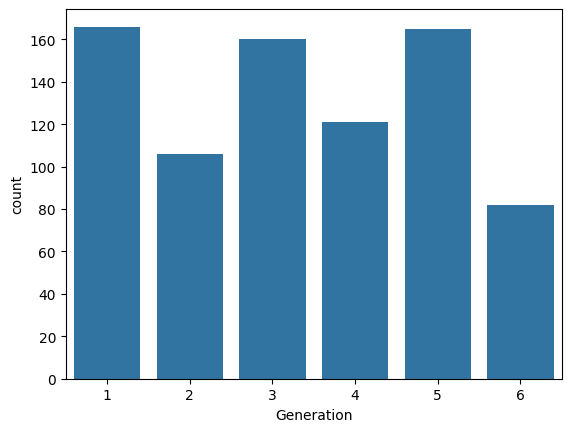

In [8]:
sns.countplot(df, x="Generation");

### Ejercicio 2:
- Representar la frecuencia de pokémons por tipo 1 en un gráfico de barras.

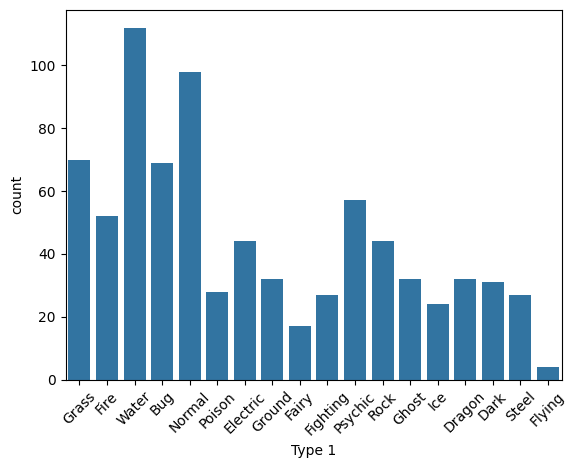

In [9]:
sns.countplot(df, x="Type 1")
plt.xticks(rotation=45);

In [10]:
sorted_types_desc = df["Type 1"].value_counts().index
sorted_types_desc

Index(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Rock',
       'Electric', 'Ground', 'Ghost', 'Dragon', 'Dark', 'Poison', 'Fighting',
       'Steel', 'Ice', 'Fairy', 'Flying'],
      dtype='object', name='Type 1')

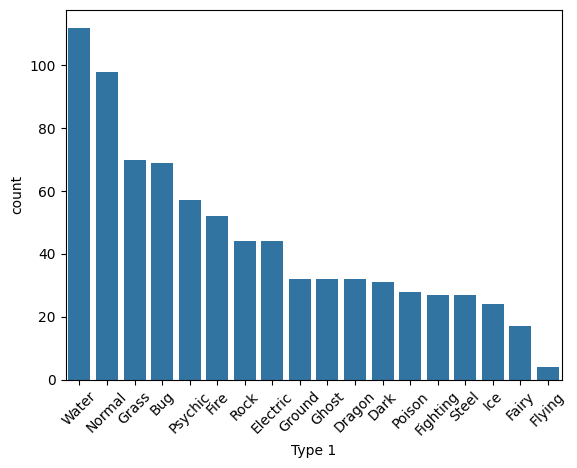

In [11]:
sns.countplot(df, x="Type 1", order= sorted_types_desc)
plt.xticks(rotation=45);

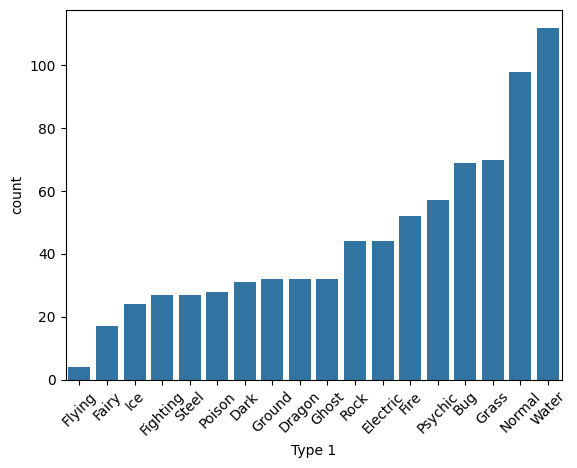

In [12]:
sns.countplot(df, x="Type 1", order= df["Type 1"].value_counts(ascending=True).index)
plt.xticks(rotation=45);

### Ejercicio 3:
- Haz un diagrama de barras con el número de pokémons tipo 1 igual a "Grass" y "Fire".

In [13]:
df3= df[df["Type 1"].isin(["Grass","Fire"])]

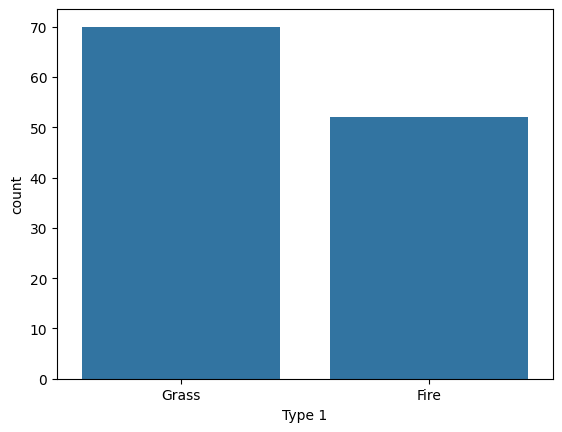

In [14]:
sns.countplot(x = df3["Type 1"]);

### Ejercicio 4:
- Haz un histograma con los puntos de salud HP de los pokémons, utiliza el color verde.
- Dibuja una línea vertical magenta que represente el promedio.

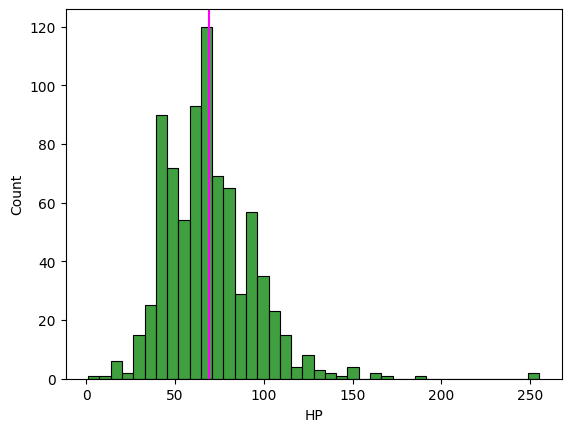

In [15]:
sns.histplot(df, x="HP", color= "green")
plt.axvline(df["HP"].mean(), color="magenta");

### Ejercicio 5:
-  Haz un histograma con la frecuencia de pokémons por rapidez (Speed).
-  Dibuja una línea vertical magenta que corresponda con la mediana.
-  Dibuja unas líneas verticales discontinuas de color magenta que correspondan con los cuartiles Q1 y Q3.

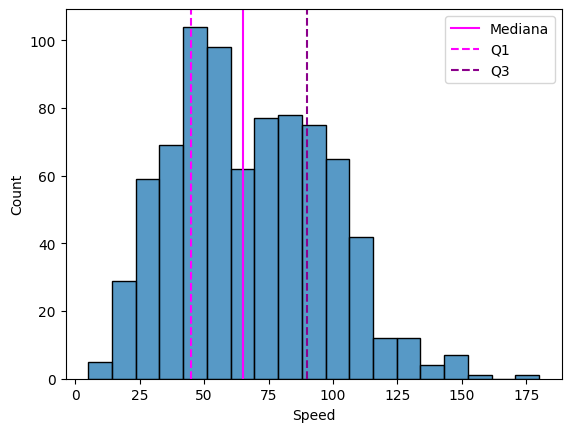

In [16]:
sns.histplot(df, x= "Speed")
plt.axvline(df["Speed"].median(), color="magenta", label= f"Mediana")
plt.axvline(df["Speed"].quantile(0.25), color='magenta', linestyle='dashed', label= f"Q1")
plt.axvline(df["Speed"].quantile(0.75), color='darkmagenta', linestyle='dashed', label= f"Q3");
plt.legend()

### Ejercicio 6:
- Haz un histograma con los puntos de salud (HP) de los pokémons (Type 1) = "Fire".

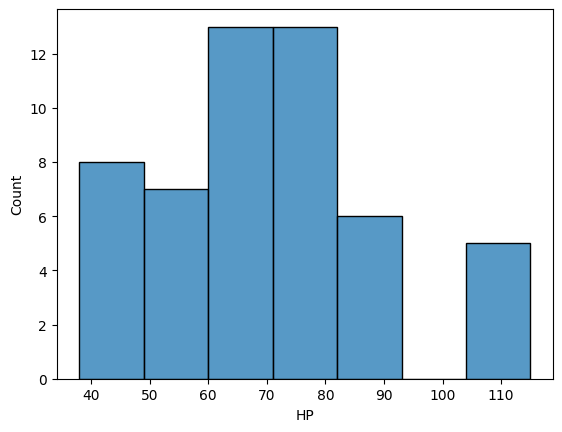

In [17]:
df6= df[df["Type 1"] == "Fire"]
sns.histplot(df, x = df6["HP"]);

### Ejercicio 7:
- Haz un scatter plot y un scatter hex plot con los valores de "Attack" y "Defense"de los pokémons.

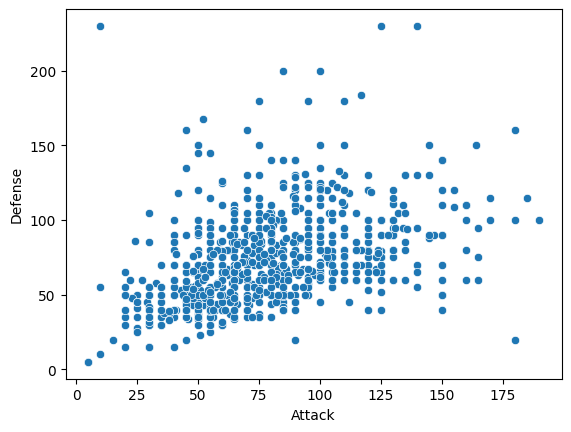

In [18]:
sns.scatterplot(x= df["Attack"], y= df["Defense"]);

In [19]:
# Scatter hex plot = Joint Plots

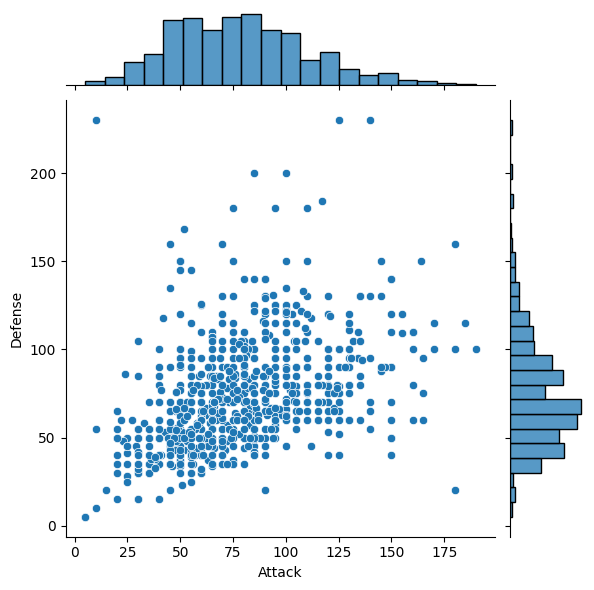

In [20]:
sns.jointplot(x= df["Attack"], y= df["Defense"])
plt.show()

### Ejercicio 8:
- Haz un scatter hex plot con los valores de "Attack" y "Defense"de los pokémons tipo "Water" y "Fire".

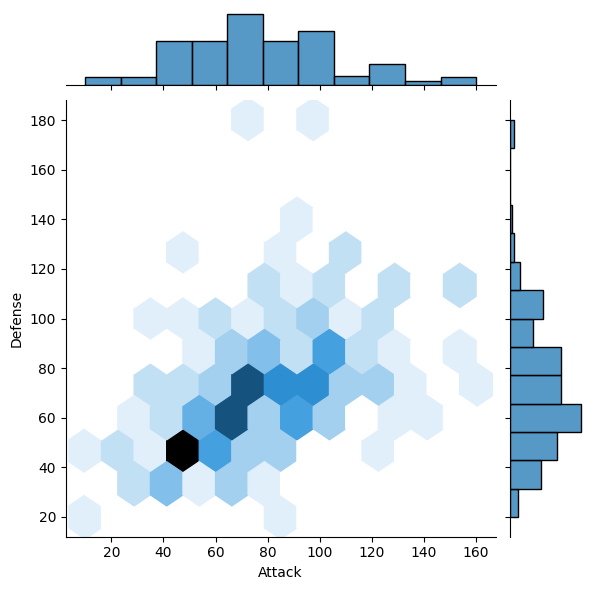

In [21]:
sns.jointplot(df[df["Type 1"].isin(["Water", "Fire"])], x= "Attack", y= "Defense", kind="hex")
plt.show()

### Ejercicio 9:
- Haz un KDE plot con la salud y el ataque de los pokémons.

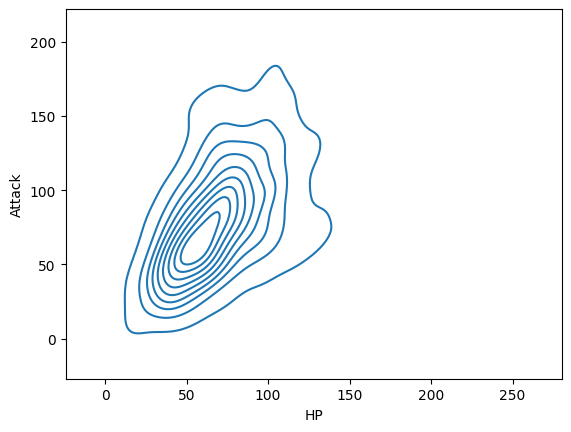

In [22]:
sns.kdeplot(x = df["HP"], y= df["Attack"])
plt.show()

### Ejercicio 10:
- Haz una grafica de caja con el ataque de los pokémons legendarios y no legendarios.

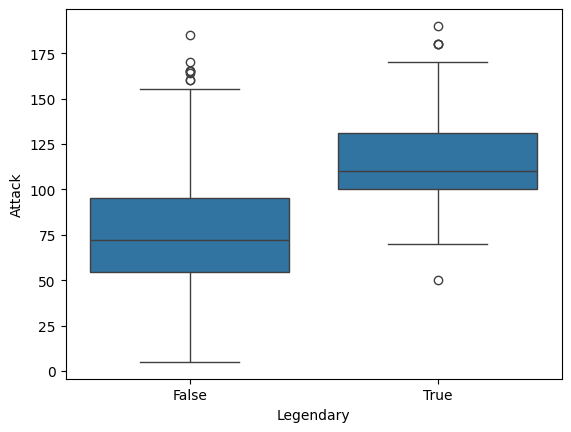

In [23]:
sns.boxplot(x= df["Legendary"],
            y= df["Attack"]);

In [24]:
pokemon_colors = {
    "Normal": "#A8A77A",
    "Fire": "#EE8130",
    "Water": "#6390F0",
    "Electric": "#F7D02C",
    "Grass": "#7AC74C",
    "Ice": "#96D9D6",
    "Fighting": "#C22E28",
    "Poison": "#A33EA1",
    "Ground": "#E2BF65",
    "Flying": "#A98FF3",
    "Psychic": "#F95587",
    "Bug": "#A6B91A",
    "Rock": "#B6A136",
    "Ghost": "#735797",
    "Dragon": "#6F35FC",
    "Dark": "#705746",
    "Steel": "#B7B7CE",
    "Fairy": "#D685AD"
}

### Ejercicio 11:
- Haz una grafica de violin con el ataque de los pokémons legendarios y no legendarios.

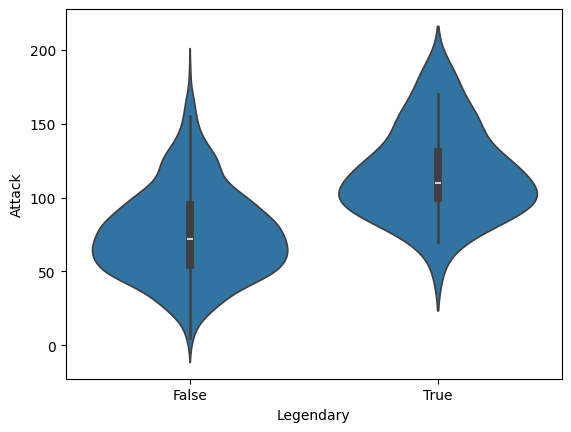

In [25]:
sns.violinplot(x= df["Legendary"],
            y= df["Attack"]);

### Ejercicio 12:
- Haz un pairplot y compara los puntos de salud (HP), el ataque y la defensa de los pokémons.

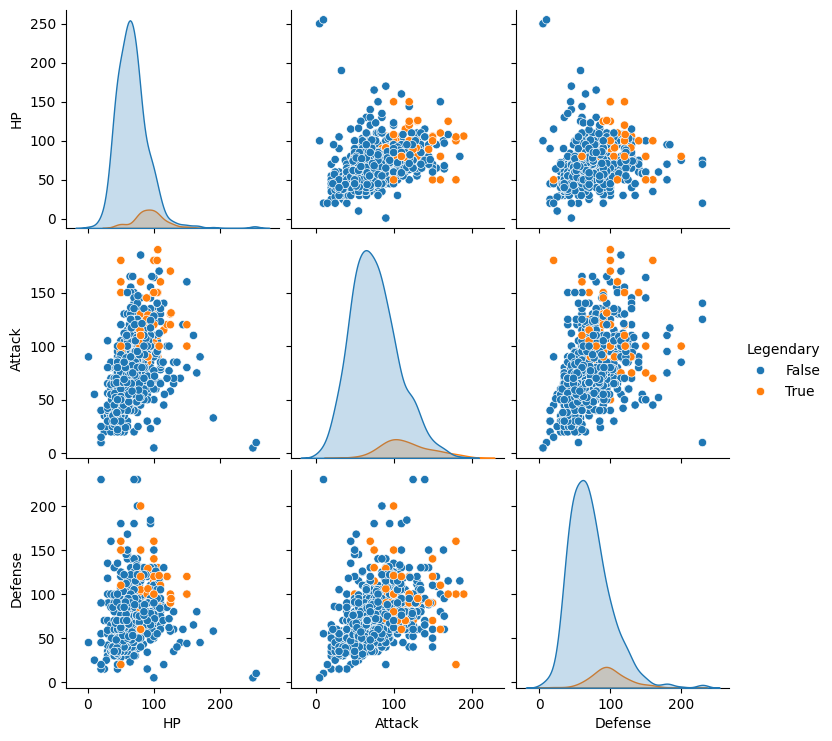

In [26]:
sns.pairplot(df, vars=["HP", "Attack", "Defense"], hue="Legendary") 
# Hue = colorear en base a una columna, en este ejercicio no lo pide.

### Ejercicio 13:
- Haz boxplots de la variable 'Total' distinguiendo por generación y entre legendarios y no legendarios.

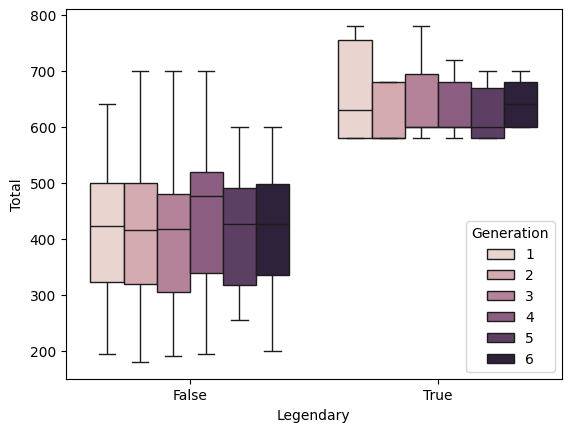

In [27]:
sns.boxplot(df, x ="Legendary",
            y = "Total", hue="Generation")
plt.show()
# Distinguiendo por generación

### Ejercicio 14:
- Haz un heatmap para comparar la correlación entre salud, ataque, ataque especial, defensa, defensa especial y velocidad.

In [28]:
df[["HP", "Attack", "Sp. Atk", "Defense", "Sp. Def", "Speed"]].corr()

,HP,Attack,Sp. Atk,Defense,Sp. Def,Speed
HP,1.000000,0.422386,0.362380,0.239622,0.378718,0.175952
Attack,0.422386,1.000000,0.396362,0.438687,0.263990,0.381240
Sp. Atk,0.362380,0.396362,1.000000,0.223549,0.506121,0.473018
Defense,0.239622,0.438687,0.223549,1.000000,0.510747,0.015227
Sp. Def,0.378718,0.263990,0.506121,0.510747,1.000000,0.259133
Speed,0.175952,0.381240,0.473018,0.015227,0.259133,1.000000


<Axes: >

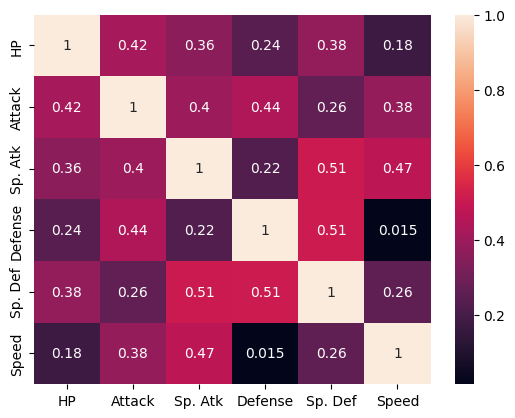

In [29]:
sns.heatmap(df[["HP", "Attack", "Sp. Atk", "Defense", "Sp. Def", "Speed"]].corr(), annot=True)

<Axes: >

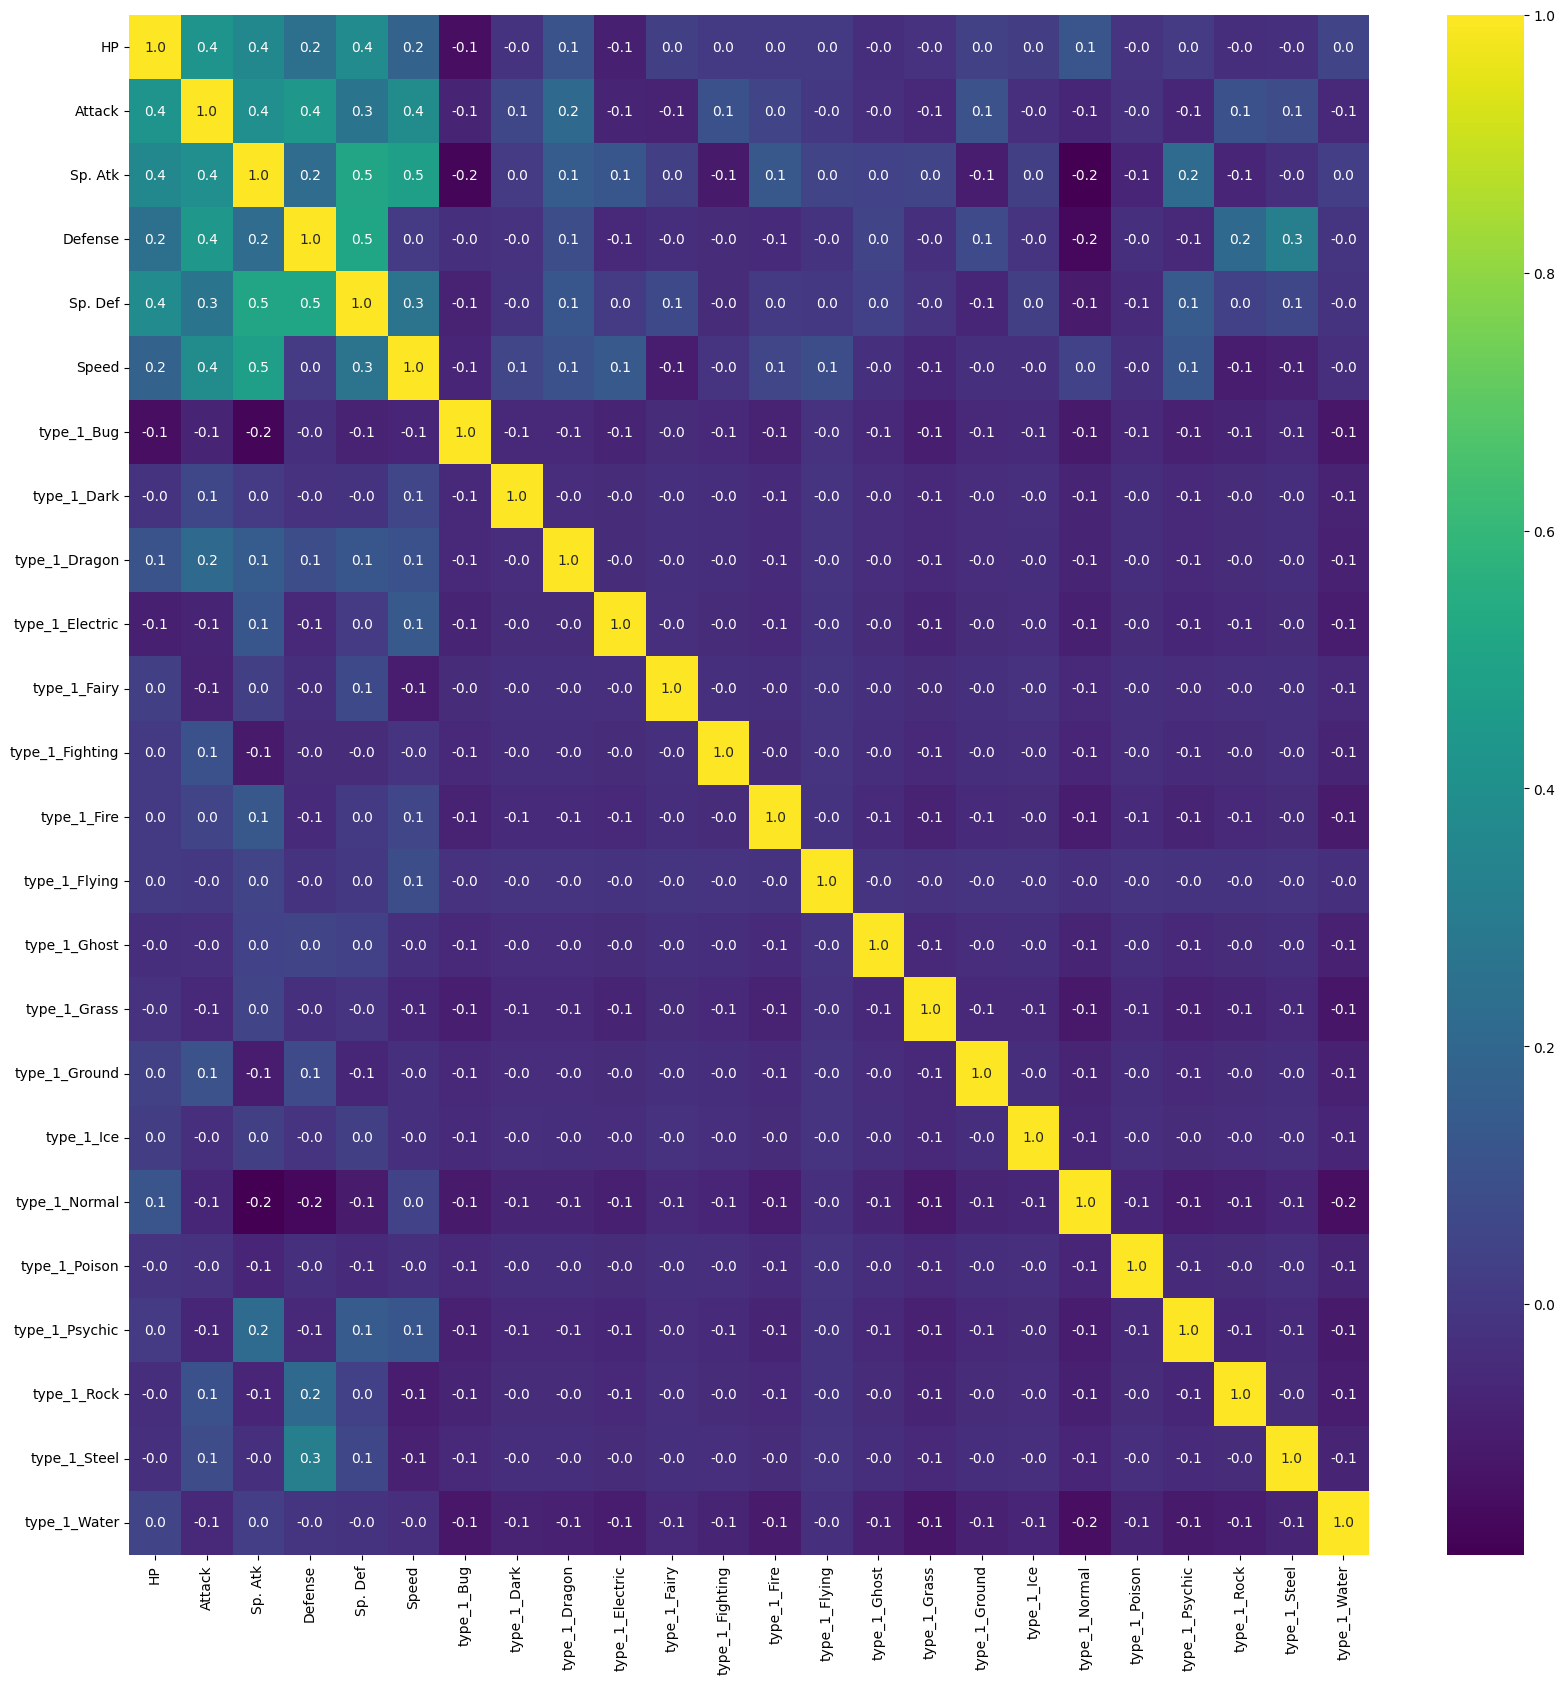

In [30]:
plt.figure(figsize=(20,20))
type1_dummies = pd.get_dummies(df['Type 1'], prefix='type_1')
df_numericas= df[["HP", "Attack", "Sp. Atk", "Defense", "Sp. Def", "Speed"]]
df_concat= pd.concat([df_numericas, type1_dummies], axis=1)
df_corr= df_concat.corr()
sns.heatmap(df_corr, annot=True, fmt= ".1f", cmap="viridis")

### Ejercicio 15:
- Encontrar los 5 mejores pokémons con respecto a la columna "Total", del tipo "Electric", "Fire", "Water" y comparar su salud, ataque, defensa y velocidad en un mapa de calor.

In [31]:
df_15= df[df["Type 1"].isin(["Electric", "Fire", "Water"])].sort_values("Total", ascending=False).head(5)
df_15

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
541,484,Palkia,Water,Dragon,680,90,120,100,150,120,100,4,True
421,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False


<Axes: >

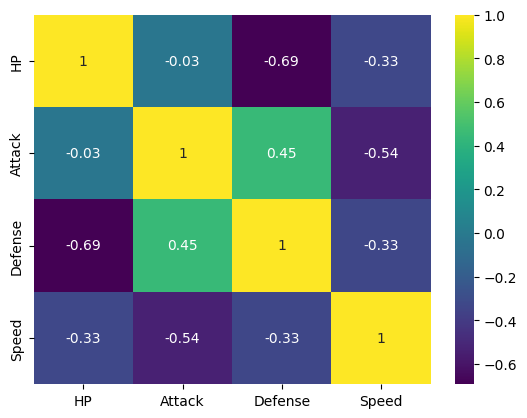

In [32]:
sns.heatmap(df_15[["HP", "Attack", "Defense", "Speed"]].corr(), annot=True, cmap="viridis")

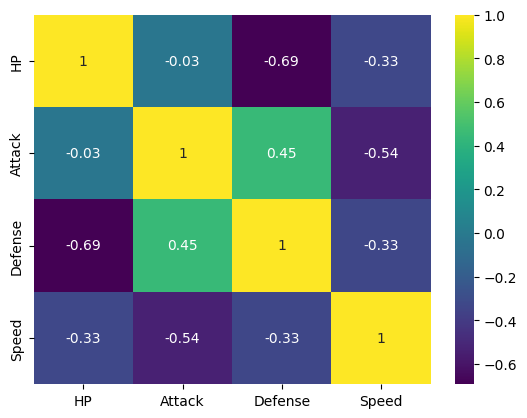

In [33]:
# Guardar gráfico 
sns.heatmap(df_15[["HP", "Attack", "Defense", "Speed"]].corr(), annot=True, cmap="viridis")
plt.savefig("heatmap.png")

### Ejercicio 16:
- Usando FacetGrid obtén un KDE plot del ataque para legendarios y no legendarios.
- Repite lo mismo, ahora separándolos también por generaciones en cada fila.

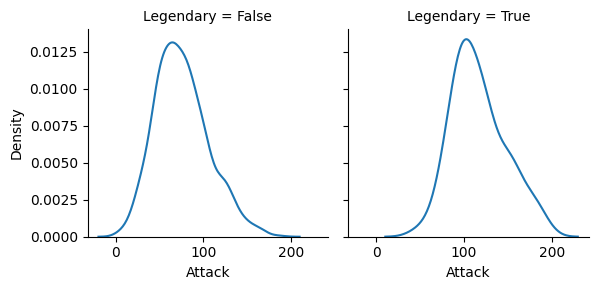

In [34]:
df16= sns.FacetGrid(df, col= "Legendary") # row = fila, col= columna
df16.map(sns.kdeplot, "Attack")

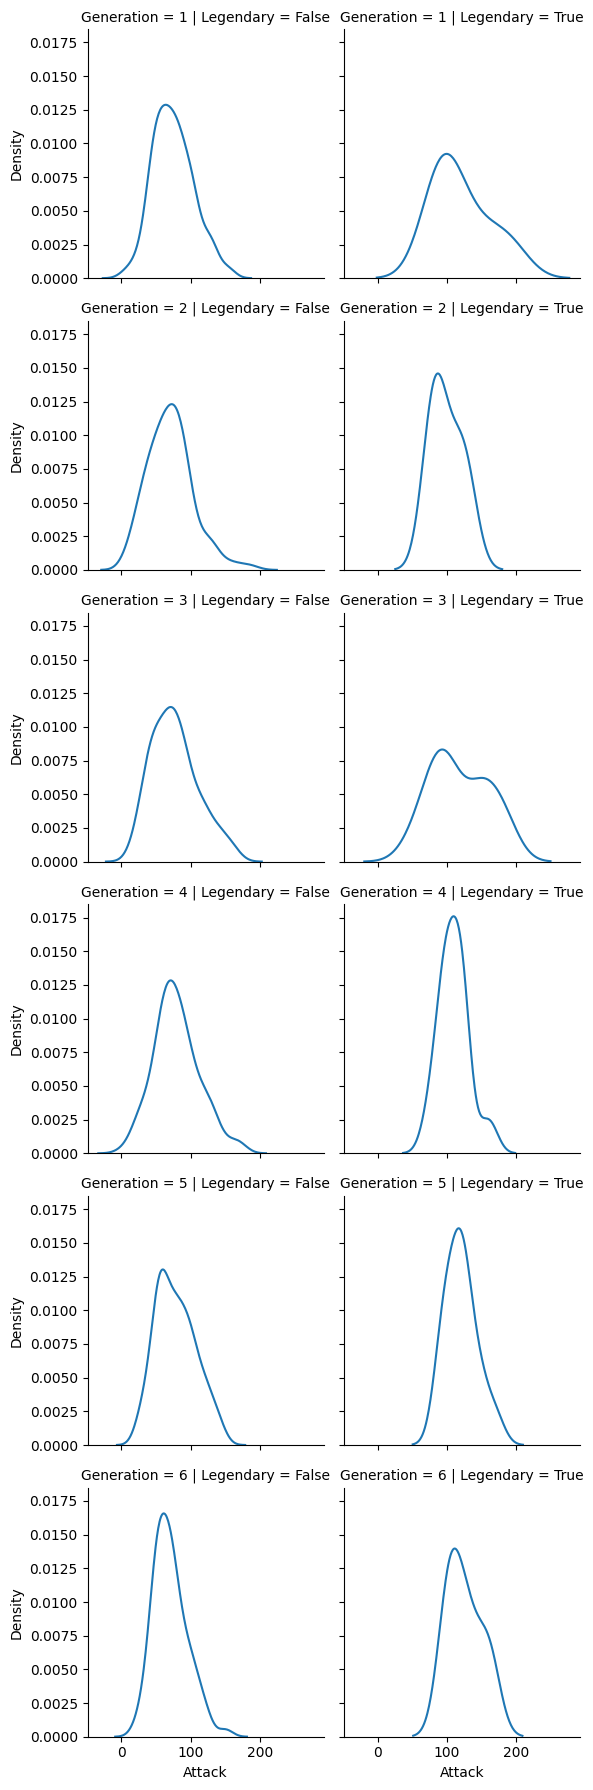

In [35]:
df16_2 = sns.FacetGrid(df, col= "Legendary", row="Generation")
df16_2.map(sns.kdeplot, "Attack")